In [14]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import pytz 

In [15]:
data = pd.read_csv('customers.csv')

In [16]:
print(data.head()) 
#gives first 5 rows

                        _id                 Timestamp  Directory  \
0  67da8e311f0d8f0cab41015d  2024-11-16T15:13:00.000Z  /customer   
1  67da8e311f0d8f0cab41015e  2024-11-16T15:28:00.000Z  /customer   
2  67da8e311f0d8f0cab41015f  2024-11-16T15:43:00.000Z  /customer   
3  67da8e311f0d8f0cab410160  2024-11-16T15:58:00.000Z  /customer   
4  67da8e311f0d8f0cab410161  2024-11-16T16:13:00.000Z  /customer   

   Files Added (GB)  Files Deleted (GB)  Files Modified (GB)  \
0          4.799212            1.878450             0.162105   
1          0.834040            1.979430             0.751865   
2          1.660266            3.921179             0.073107   
3          3.398410            0.897997             0.695277   
4          0.866733            2.410200             0.217080   

   Current Space (GB)  
0          102.920762  
1          101.775372  
2           99.514459  
3          102.014872  
4          100.471405  


In [17]:
print(data.info()) 
#//gives column of data also datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12204 entries, 0 to 12203
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  12204 non-null  object 
 1   Timestamp            12204 non-null  object 
 2   Directory            12204 non-null  object 
 3   Files Added (GB)     12204 non-null  float64
 4   Files Deleted (GB)   12204 non-null  float64
 5   Files Modified (GB)  12204 non-null  float64
 6   Current Space (GB)   12204 non-null  float64
dtypes: float64(4), object(3)
memory usage: 667.5+ KB
None


In [18]:
print(data.describe())
#mean all gives

       Files Added (GB)  Files Deleted (GB)  Files Modified (GB)  \
count      12204.000000        12204.000000         12204.000000   
mean           2.527000            2.304359             0.557609   
std            1.422358            1.283637             0.321580   
min            0.013178            0.016726             0.002948   
25%            1.283454            1.206874             0.298792   
50%            2.523408            2.310110             0.543657   
75%            3.747327            3.412236             0.786125   
max            4.999971            4.993046             1.995252   

       Current Space (GB)  
count        12204.000000  
mean          1479.223492  
std            787.857538  
min             89.514190  
25%            760.201129  
50%           1550.932677  
75%           2193.776289  
max           2500.000000  


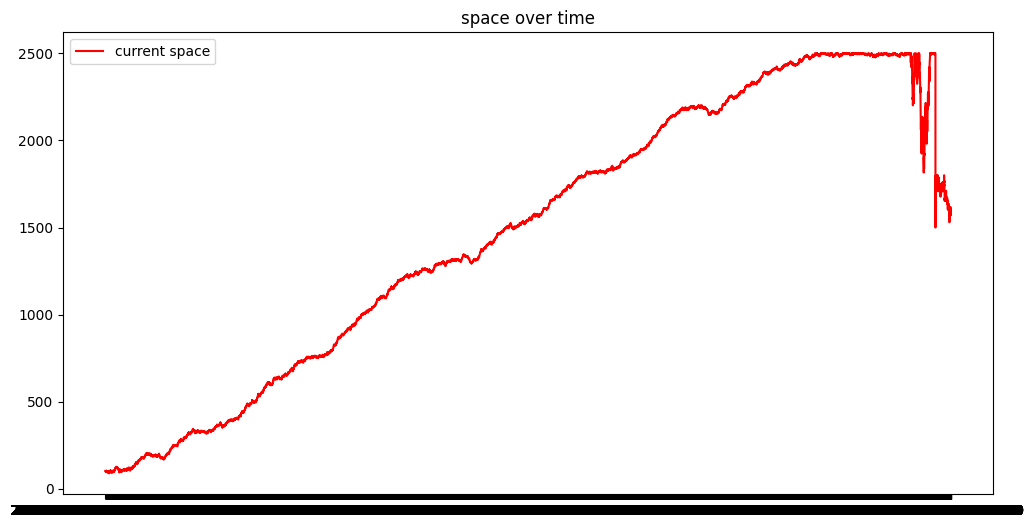

In [19]:
#initial data visualization


plt.figure(figsize=(12,6))
plt.plot(data['Timestamp'], data['Current Space (GB)'],label="current space",color="red")
plt.title("space over time")
plt.legend()
plt.show()


In [20]:
#drop non-numeric column
numric_data = data.select_dtypes(include=["int64","float64"])
print(numric_data)

       Files Added (GB)  Files Deleted (GB)  Files Modified (GB)  \
0              4.799212            1.878450             0.162105   
1              0.834040            1.979430             0.751865   
2              1.660266            3.921179             0.073107   
3              3.398410            0.897997             0.695277   
4              0.866733            2.410200             0.217080   
...                 ...                 ...                  ...   
12199          1.487719            1.185394             1.775083   
12200          4.543668            4.075297             0.093101   
12201          4.945050            2.147003             1.625973   
12202          4.814476            1.054953             1.386340   
12203          0.966319            2.976364             1.112566   

       Current Space (GB)  
0              102.920762  
1              101.775372  
2               99.514459  
3              102.014872  
4              100.471405  
...            

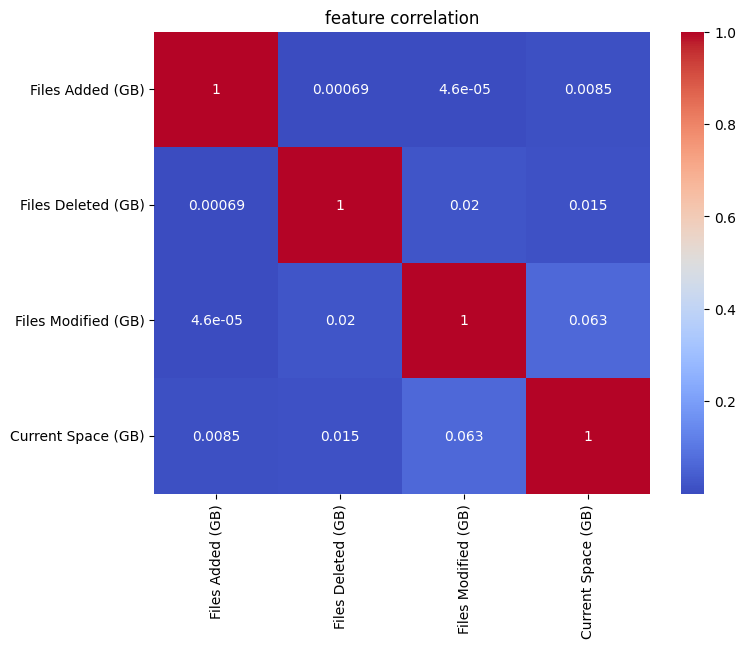

In [21]:
plt.figure(figsize = (8,6))
sns.heatmap(numric_data.corr(),annot=True ,cmap="coolwarm")
plt.title("feature correlation")
plt.show()

In [25]:

# ✅ Convert 'Timestamp' to datetime format with UTC timezone
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce', utc=True)

# ✅ Drop rows with invalid timestamps (NaT values)
data = data.dropna(subset=['Timestamp'])

# ✅ Define date range with UTC timezone
utc_zone = pytz.UTC
start_date = utc_zone.localize(datetime(2024, 11, 24))
end_date = utc_zone.localize(datetime(2025, 3, 19))

# ✅ Filter data within the date range
prediction = data[(data['Timestamp'] > start_date) & (data['Timestamp'] < end_date)]

# ✅ Print filtered data
print(prediction)

                            _id                 Timestamp  Directory  \
708    67da8e311f0d8f0cab410421 2024-11-24 00:13:00+00:00  /customer   
709    67da8e311f0d8f0cab410422 2024-11-24 00:28:00+00:00  /customer   
710    67da8e311f0d8f0cab410423 2024-11-24 00:43:00+00:00  /customer   
711    67da8e311f0d8f0cab410424 2024-11-24 00:58:00+00:00  /customer   
712    67da8e311f0d8f0cab410425 2024-11-24 01:13:00+00:00  /customer   
...                         ...                       ...        ...   
11516  67da8e341f0d8f0cab412e59 2025-03-16 14:13:00+00:00  /customer   
11517  67da8e341f0d8f0cab412e5a 2025-03-16 14:28:00+00:00  /customer   
11518  67da8e341f0d8f0cab412e5b 2025-03-16 14:43:00+00:00  /customer   
11519  67da8e341f0d8f0cab412e5c 2025-03-16 14:58:00+00:00  /customer   
11520  67da8e341f0d8f0cab412e5d 2025-03-16 15:13:00+00:00  /customer   

       Files Added (GB)  Files Deleted (GB)  Files Modified (GB)  \
708            2.369375            1.884738             0.499574   

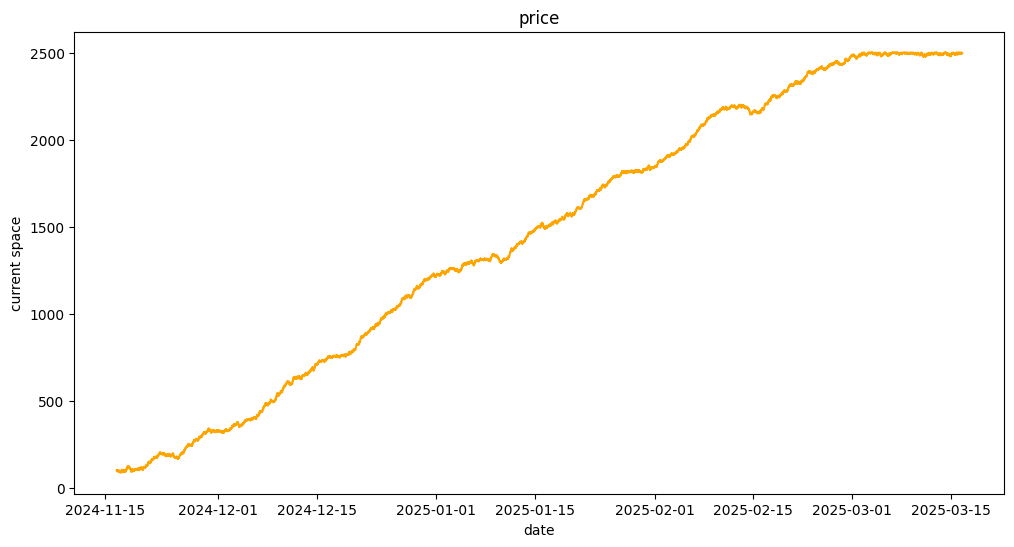

In [26]:
plt.figure(figsize=(12,6))
plt.plot(data['Timestamp'], data['Current Space (GB)'],color="orange")
plt.xlabel("date")
plt.ylabel("current space")
plt.title("price")
plt.show()

In [27]:
#prepare LSTM model (sequential)

stock_close = data["Current Space (GB)"]

dataset = stock_close.values #convert to numpy array
training_data_len = int(np.ceil(len(dataset)*0.95))

In [28]:
#preprocessing stages

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

training_data = scaled_data[:training_data_len] #95 percent of all data

X_train,y_train =[],[]


#create a sliding window for our stock

for i in range(60,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))


In [40]:
# Initialize the Sequential Model
model = keras.models.Sequential()

# First LSTM layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Second LSTM layer
model.add(keras.layers.LSTM(64, return_sequences=False))

# Third Dense Layer
model.add(keras.layers.Dense(128, activation="relu"))

# Fourth Dropout Layer
model.add(keras.layers.Dropout(0.5))

# Fifth Output Layer
model.add(keras.layers.Dense(1))

# Display Model Summary
model.summary()

# Compile the Model
model.compile(optimizer="adam", loss="mae", metrics=[keras.metrics.RootMeanSquaredError()])

# Train the Model
training = model.fit(X_train, y_train, epochs=40, batch_size=32)

# Prepare Test Data
test_data = scaled_data[training_data_len - 60:]

X_test, y_test = [], dataset[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60:i, 0])

# Convert to NumPy array and reshape for LSTM
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make Predictions
predictions = model.predict(X_test)

# Inverse transform predictions
predictions = scaler.inverse_transform(predictions)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.2014 - root_mean_squared_error: 0.3030
Epoch 2/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.1002 - root_mean_squared_error: 0.1430
Epoch 3/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0953 - root_mean_squared_error: 0.1363
Epoch 4/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0980 - root_mean_squared_error: 0.1383
Epoch 5/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0939 - root_mean_squared_error: 0.1350
Epoch 6/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0958 - root_mean_squared_error: 0.1353
Epoch 7/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0941 - root_mean_squared_error: 0.1339
Epoch 8/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0930 - root_mean_squared_error: 0.1315
Epoch 9/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0949 - root_mean_squared_error: 0.1366
Epoch 10/40
341/341 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0922 - root_me

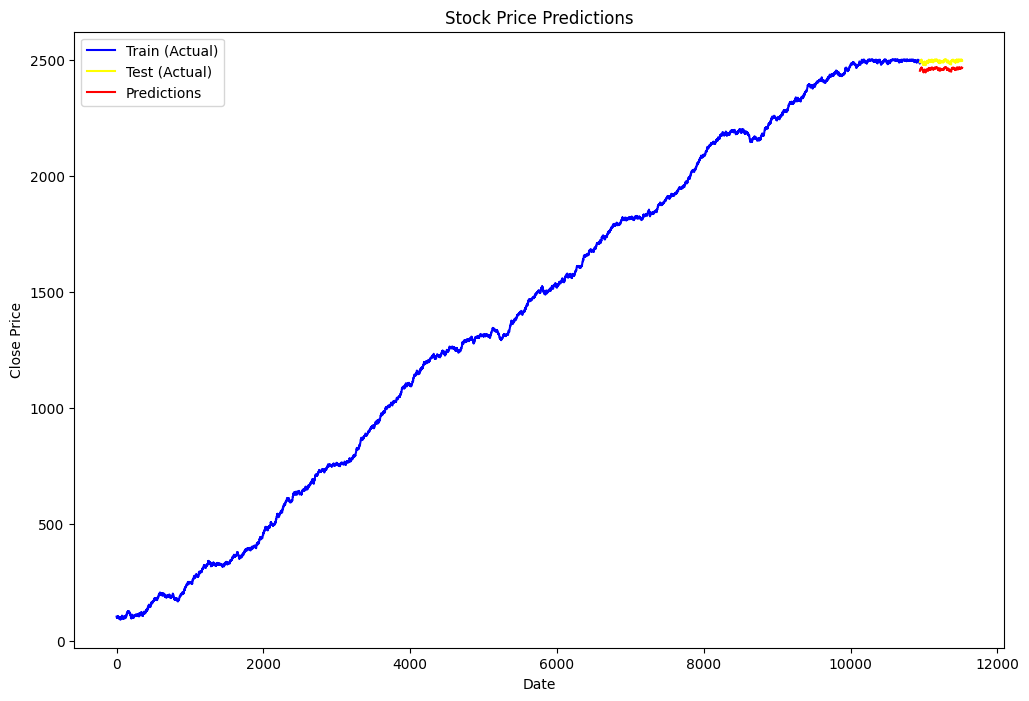

In [41]:
# Split dataset into train and test
train = data[:training_data_len]
test = data[training_data_len:].copy()  # Fix indexing issue

# Add predictions to the test set
test['Predictions'] = predictions  # Fix typo

# Plot the actual and predicted stock prices
plt.figure(figsize=(12, 8))

# Train data plot
plt.plot(train.index, train['Current Space (GB)'], label="Train (Actual)", color='blue')

# Test data plot
plt.plot(test.index, test['Current Space (GB)'], label="Test (Actual)", color='yellow')

# Predictions plot
plt.plot(test.index, test['Predictions'], label="Predictions", color='red')

# Labels and Title
plt.title("Stock Price Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

# Show the plot
plt.show()